In [1]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [4]:
# Create a SparkSession
spark = SparkSession.builder.getOrCreate()
spark.sparkContext.setLogLevel("WARN")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/25 16:54:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
# Define the schema for the columns
schema = "CRIM double, ZN double, INDUS double, CHAS double, NOX double, RM double, AGE double, DIS double, RAD double, TAX double, PTRATIO double, B double, LSTAT double, MEDV double"



In [6]:
# Read the CSV file with the specified schema
df = spark.read.csv("../Resources/HousingData.csv", header=True, schema=schema)

In [7]:
# Remove rows with null values
df = df.dropna()

In [8]:
# Show the content of the DataFrame
df.show()

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7|394.12| 5.21|28.7|
|0.14455|12.5| 7.87| 0.0|0.524|6.172| 96.1|5.9505|5.0|311.0|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87| 0.0|0.524|5.631|100.0|6.0821|5.0|311.0|   15.2|386.63|29.93|16.5|
|0.22489|12.5| 7.87| 0.0|0.524|6.377| 94.3|6.3467|5.0|311.0|   15.2|392.52|20.45|15.0|
|0.11747|12.5| 7.87| 0.0|0.524|6.009| 82.9|

In [9]:
# Convert Spark DataFrame to Pandas DataFrame
pd_df = df.toPandas()

In [12]:
pd_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [14]:
# Load the data
# Assuming you have loaded your data into the pandas DataFrame "pd_df"
# Split the data into 80% training and 20% test
X = pd_df.drop('MEDV', axis=1)  # Input features
y = pd_df['MEDV']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training targets shape: {y_train.shape}")
print(f"Test targets shape: {y_test.shape}")

Training data shape: (315, 13)
Test data shape: (79, 13)
Training targets shape: (315,)
Test targets shape: (79,)


In [16]:
# Create the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # input layer
model.add(Dense(units=32, activation='relu'))  # hidden layer
model.add(Dense(units=1))  # output layer

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [18]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# # Train the model
# history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=1)

In [37]:
# Train the model with a smaller number of epochs
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
8/8 [==============================] - 0s 4ms/step - loss: 12.6576 - mae: 2.7186 - val_loss: 16.8912 - val_mae: 2.9692
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 12.7439 - mae: 2.7432 - val_loss: 20.3762 - val_mae: 3.5980
Epoch 3/150
8/8 [==============================] - 0s 1ms/step - loss: 10.9349 - mae: 2.5124 - val_loss: 18.9642 - val_mae: 3.3967
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 11.8263 - mae: 2.6313 - val_loss: 17.4509 - val_mae: 3.0382
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 10.6686 - mae: 2.5388 - val_loss: 20.1291 - val_mae: 2.9863
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 9.8306 - mae: 2.3878 - val_loss: 17.9397 - val_mae: 3.2016
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 10.5170 - mae: 2.5226 - val_loss: 23.5311 - val_mae: 3.2686
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 11.8533 - mae

8/8 [==============================] - 0s 1ms/step - loss: 11.1613 - mae: 2.6128 - val_loss: 17.8430 - val_mae: 3.1402
Epoch 64/150
8/8 [==============================] - 0s 1ms/step - loss: 11.7223 - mae: 2.5687 - val_loss: 19.7831 - val_mae: 2.9919
Epoch 65/150
8/8 [==============================] - 0s 1ms/step - loss: 10.4800 - mae: 2.4686 - val_loss: 18.0641 - val_mae: 2.9128
Epoch 66/150
8/8 [==============================] - 0s 1ms/step - loss: 12.2564 - mae: 2.7042 - val_loss: 28.9261 - val_mae: 3.7910
Epoch 67/150
8/8 [==============================] - 0s 1ms/step - loss: 15.6259 - mae: 3.1715 - val_loss: 28.4585 - val_mae: 3.8383
Epoch 68/150
8/8 [==============================] - 0s 1ms/step - loss: 13.0489 - mae: 2.7775 - val_loss: 21.6370 - val_mae: 3.3130
Epoch 69/150
8/8 [==============================] - 0s 1ms/step - loss: 10.8599 - mae: 2.5529 - val_loss: 20.2776 - val_mae: 3.0539
Epoch 70/150
8/8 [==============================] - 0s 1ms/step - loss: 10.8132 - mae: 2.

8/8 [==============================] - 0s 2ms/step - loss: 11.5199 - mae: 2.5024 - val_loss: 28.3897 - val_mae: 3.5857
Epoch 126/150
8/8 [==============================] - 0s 2ms/step - loss: 12.3315 - mae: 2.7408 - val_loss: 17.9612 - val_mae: 2.8801
Epoch 127/150
8/8 [==============================] - 0s 2ms/step - loss: 9.4218 - mae: 2.3200 - val_loss: 18.2394 - val_mae: 3.1487
Epoch 128/150
8/8 [==============================] - 0s 2ms/step - loss: 9.0450 - mae: 2.2802 - val_loss: 18.2650 - val_mae: 2.9625
Epoch 129/150
8/8 [==============================] - 0s 2ms/step - loss: 8.7628 - mae: 2.2474 - val_loss: 17.9690 - val_mae: 2.9719
Epoch 130/150
8/8 [==============================] - 0s 2ms/step - loss: 9.3620 - mae: 2.4208 - val_loss: 18.5354 - val_mae: 2.9985
Epoch 131/150
8/8 [==============================] - 0s 1ms/step - loss: 9.5886 - mae: 2.3540 - val_loss: 21.4783 - val_mae: 3.0358
Epoch 132/150
8/8 [==============================] - 0s 2ms/step - loss: 9.9919 - mae: 2

In [38]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 846us/step - loss: 32.0751 - mae: 3.1546


In [39]:
# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Test Loss: 32.0751
Test Mean Absolute Error (MAE): 3.1546


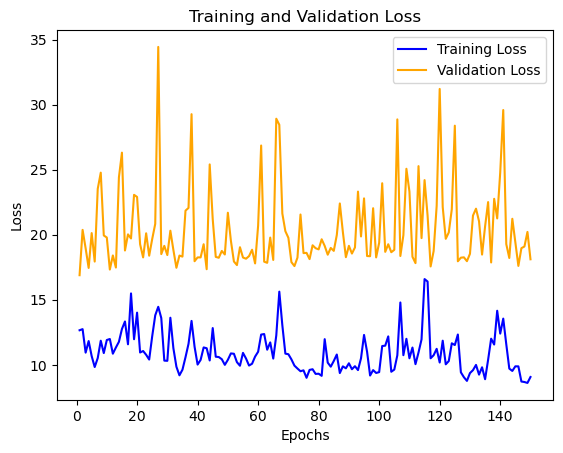

In [40]:
# plot loss curve during training (loss at the end of each epoch or iteration)
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

# plot training loss
plt.plot(epochs, loss_values, label='Training Loss', color='blue')

# plot validation loss
plt.plot(epochs, val_loss_values, label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

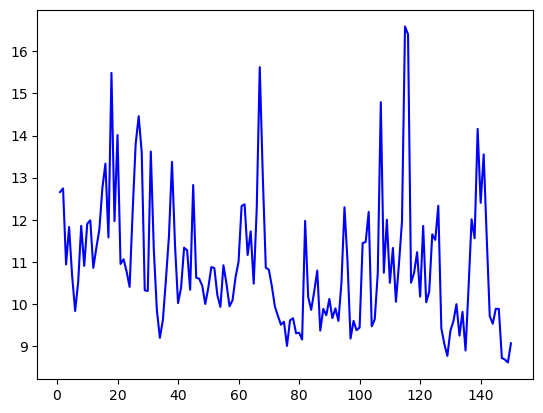

In [41]:
# Plot training loss
plt.plot(epochs, loss_values, label='Training Loss', color='blue')

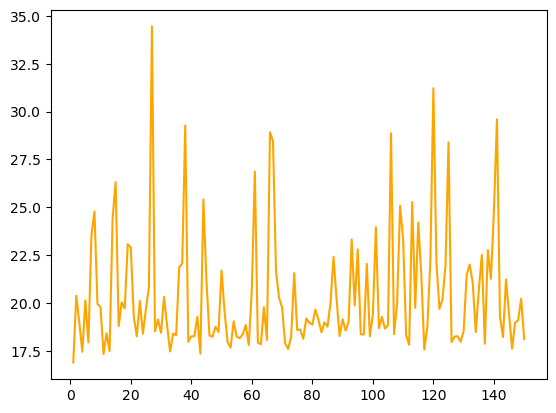

In [42]:
# Plot validation loss
plt.plot(epochs, val_loss_values, label='Validation Loss', color='orange')

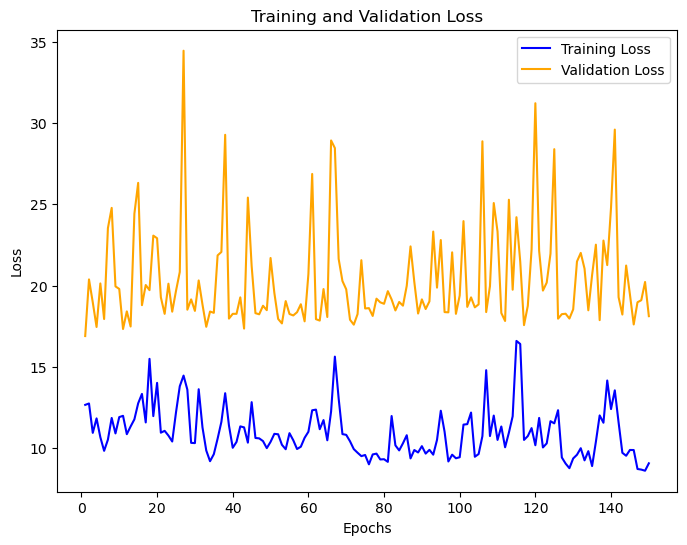

In [43]:
# Adjust the figure size
plt.figure(figsize=(8, 6))  # Set the desired width and height of the figure

# Plot training loss
plt.plot(epochs, loss_values, label='Training Loss', color='blue')

# Plot validation loss
plt.plot(epochs, val_loss_values, label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()